## Linearna regresija sa tezinama

Nekada se u zadacima linearne regresije javlja potreba da predikcija u određenim tačkama bude što je moguće preciznija. Na primer, kada se takve tačke često pojavljuju ili kada su greške u tim tačkama izrazito skupe ili nepoželjne. U modelovanju se ovakvi zahtevi uzimaju u obzir korišćenjem linearne regresije sa težinama. 

<br>

Linearna regresija se težinama ima za cilj minimizaciju otežanih kvadrata reziduala $\sum_{i}{w_i(y_i - \beta\cdot x_i)^2}$. Prosta linearna regresija je specijalni slučaj linearne regresije sa težinama za vrednosti koeficijenata $w_i = 1$. Koeficijenti se mogu odabrati proizvoljno, u skladu sa zahtevima modelovanja i prioritetima. 

<br>

Algebarska forma rešenja linearne regresije sa težinama je oblika $(X^TWX)^{-1}X^TWy$ u kojoj je $W$ dijagonalna matrica sa težinama $w_i$ na glavnoj dijagonali.

Nadalje će biti korišćen sintetički skup podataka sa idejom da se odredi regresioni model koji će u tačkama čiji su indeksi iz intervala [10,30) povećati preciznost.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn import linear_model
from sklearn import metrics

In [3]:
np.random.seed(11)

1. Generisemo skup tacaka

In [4]:
N = 50 
x = np.random.randn(N)
y = 3 + 2*x + np.random.normal(0, 9, N)

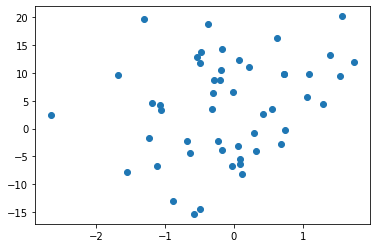

In [5]:
plt.scatter(x, y)
plt.show()

2. Odredjujemo linearni model 

In [6]:
model = linear_model.LinearRegression()
model.fit(x.reshape(-1, 1), y)
beta0, beta1 = model.intercept_, model.coef_[0]

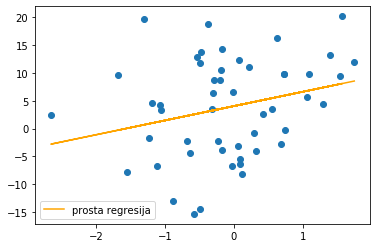

In [7]:
plt.scatter(x, y)
plt.plot(x, beta0+beta1*x, color = 'orange', label = 'prosta regresija')
plt.legend(loc = 'best')
plt.show()

3. Odredjujemo model sa tezinama

In [8]:
weights = np.ones(N)
index_from = 10
index_to = 30
weights[index_from:index_to] *= 4

In [9]:
model_with_weights = linear_model.LinearRegression()
model_with_weights.fit(x.reshape(-1, 1), y, weights)
beta0_with_weights, beta1_with_weights = model_with_weights.intercept_, model_with_weights.coef_[0]

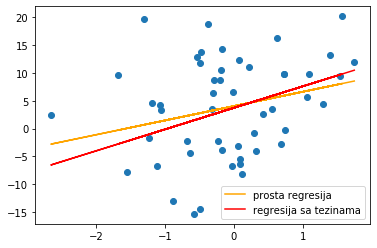

In [10]:
plt.scatter(x, y)
plt.plot(x, beta0+beta1*x, color = 'orange', label = 'prosta regresija')
plt.plot(x, beta0_with_weights+beta1_with_weights*x, color = 'red', label ='regresija sa tezinama')
plt.legend(loc = 'best')
plt.show()

4. Ocenjujemo greske ovih modela:

In [11]:
y_predicted = model.predict(x.reshape(-1, 1))
y_predicted_with_weights = model_with_weights.predict(x.reshape(-1, 1))

In [12]:
mse = metrics.mean_squared_error(y[index_from:index_to], y_predicted[index_from:index_to])
mse_with_weights = metrics.mean_squared_error(y[index_from:index_to], y_predicted_with_weights[index_from:index_to])

In [13]:
print('Regularni model: ', mse)
print('Model sa tezinama: ', mse_with_weights)

Regularni model:  90.846631807127
Model sa tezinama:  87.07191025185108


<div class="alert alert-success">
Algebarska provera
</div>

In [14]:
W = np.diag(weights)
X = np.vstack((np.ones(N), x)).T

betas = np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(y)
betas

array([3.74281563, 3.86844728])

In [15]:
beta0_with_weights, beta1_with_weights

(3.742815631062569, 3.8684472810004027)